# Generuj zestaw zadań

```{admonition} Wskazówka
:class: tip

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DyonOylloug/generator_zadan/HEAD?labpath=docs%2Fgeneruj_zestaw.ipynb) <- interaktywna sesja notebooka

```

In [1]:
import os
import sys
from random import choice

import ipywidgets as widgets
from IPython.display import display, Image, Markdown, Latex
from pdf2image import convert_from_path

import generator_zadan.generatory as gz

print(gz.__version__)

0.2.9


---

## Wybierz zadania


```{admonition} Wskazówka
:class: tip
> - Można komórki uruchamiać wielokrotnie. Aż się trafi ciekawszy przykład.
> - Można zmieniać parametry funkcji generujących.
> - Zmień __`zadanie_nr`__ na odpowiednio rozróżnialne __`zadanie_1`__,  __`zadanie_2`__ itp. Tylko te będą potem przekazywane do funkcji generującej zestaw. Domyślnie pięć zadań. Można to zmienić niżej przy wywołaniu funkcji ***generuj_LaTeX()***.
> - Na potrzeby dokumentacji na początku numery ustawione ma pierwszych pięć przykładów. 

```

### Liczby zespolone

####  Równanie liniowe

In [2]:
zadanie = gz.rownanie_liniowe()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].replace('\\', '')))
display(Latex('$$' + zadanie[0].split('\n')[2] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_1 = zadanie

** Zadanie ************************************************************************************


Rozwiązać równanie w zbiorze liczb zespolonych. Sprawdzić rozwiązanie.

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

####  Równanie kwadratowe

In [4]:
zadanie = gz.rownanie_kwadratowe()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].replace('\\', '')))
display(Latex('$$' + zadanie[0].split('\n')[2] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_2 = zadanie

** Zadanie ************************************************************************************


Rozwiązać równanie w zbiorze liczb zespolonych. Sprawdzić jedno z rozwiązań.

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

####  Pierwiastek zespolony

In [27]:
zadanie = gz.pierwiastek_zespolony(stopien=choice([3, 4]), nr_zadania=1234)
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].replace('\\', '')))
display(Latex('$$' + zadanie[0].split('\[')[1].split('\]')[0] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
temp = zadanie[1].split('\n\t')[2] + zadanie[1].split('\n\t')[5][4:]
display(Latex(f'$${temp}$$'))
display(Markdown(f'![](./pics//rozklad_pierwiastkow1234.png)'))
print("\033[32m*\033[0m" * 95)
zadanie_3 = zadanie

** Zadanie ************************************************************************************


Wyznaczyć wszystkie zadane pierwiastki zespolone i zaznaczyć je na płaszczyźnie zespolonej

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

![](./pics//rozklad_pierwiastkow1234.png)

***********************************************************************************************


####  Równanie zespolone ze sprzężeniem

In [7]:
zadanie = gz.rownanie_ze_sprzezeniem(calkowite=choice([False, True]), kwadratowe=choice([False, True]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].replace('\\', '')))
display(Latex('$$' + zadanie[0].split('\n')[2] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
rozwiazanie = zadanie[1].replace('$ \\\\ \n$', ' $ ').replace('$\\\\\n$', ' $ ').replace('$ \\\\\n$', ' $ ').split('$')
for i in range(1, len(rozwiazanie) - 1):
    display(Latex('$$' + rozwiazanie[i] + '$$'))
zadanie_2 = zadanie

** Zadanie ************************************************************************************


Rozwiązać równanie w zbiorze liczb zespolonych

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

####  Obszar zespolony

In [2]:
zadanie = gz.obszar_zespolony(typ=choice([1, 2, 3, 4, 5]), nr_zadania=1234)
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].replace('\\', '')))
display(Latex('$$' + zadanie[0].split('\[')[1].split('\]')[0] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$$\\begin{gather*}' + zadanie[1].split('{gather*}')[1] + '{gather*}$$'))
display(Markdown(f'![](./pics//obszar1234.png)'))
zadanie_4 = zadanie

** Zadanie ************************************************************************************


Zaznaczyć na płaszczyźnie zespolonej obszar spełniający warunek

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

![](./pics//obszar0.png)

#### Działania w różnych postaciach

In [4]:
zadanie = gz.dzialania_zespolone()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Markdown(zadanie[0].split('\n\t')[4]))
print("\033[34m*\033[0m" * 95)
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$$' + zadanie[1].split('$')[1] + '$$'))
print("\033[32m*\033[0m" * 95)
zadanie_5 = zadanie

** Zadanie ************************************************************************************


Obliczyć

<IPython.core.display.Latex object>

Wynik zapisać w postaci algebraicznej, trygonometrycznej i wykładniczej.

***********************************************************************************************
** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

***********************************************************************************************


### Macierze

####  Równanie macierzowe

In [5]:
print("\033[34m** Zadanie **" + '*' * 81 + '\033[0m')
zadanie = gz.rownanie_macierzowe()
display(Markdown(zadanie[0].split(':')[0]))
display(Latex(zadanie[0].split(':')[1]))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].replace('$ \\\\ \n\t$', ',\\quad ').replace('$', '$$')))
zadanie_3 = zadanie

** Zadanie ***********************************************************************************


Rozwiązać równanie

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Wyznacznik z parametrem

In [11]:
zadanie = gz.wyznacznik_parametr(wymiar=choice([2, 3, 4]), gotowiec=True)
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0][:91].replace('\\ ', ' ').replace('$', '*')))
display(Latex(zadanie[0][91:]))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].replace('$ \\\\ \n\t$', ',\\quad ').replace('$', '$$')))
zadanie_4 = zadanie

** Zadanie ************************************************************************************


Dla jakich rzeczywistych wartości parametru *x* wyznacznik macierzy *A* jest różny od zera?

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Macierz odwrotna z parametrem

In [14]:
zadanie = gz.macierz_odwrotna_parametr(wymiar=choice([2, 3, 4]), gotowiec=True)
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0][:79].replace('$', '*')))
display(Latex(zadanie[0][79:].split('W')[0]))
display(Markdown('W' + zadanie[0][79:].split('W')[1].replace('$', '*')))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
rozwiazanie = zadanie[1].replace('$\\\\\n\t$', ' $ ').split('$')
for i in range(1, len(rozwiazanie) - 1):
    display(Latex('$$' + rozwiazanie[i] + '$$'))
zadanie_5 = zadanie

** Zadanie ************************************************************************************


Dla jakich rzeczywistych wartości parametru *x* macierz *A* posiada odwrotność?

<IPython.core.display.Latex object>

Wyznaczyć macierz odwrotną dla *x=2.* 

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Wektor własne

In [10]:
zadanie = gz.wartosci_wlasne(wymiar=choice([2, 3, 4]), zespolone=choice([False, True]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0][:51]))
display(Latex(zadanie[0][51:]))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].split(', \quad')[0].replace("$", "$$")))
display(Markdown("Wartości własne"))
display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[1] + "$$"))
display(Markdown("Wektory własne"))
display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[3] + "$$"))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć wartości własne i wektory własne macierzy

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

Wartości własne

<IPython.core.display.Latex object>

Wektory własne

<IPython.core.display.Latex object>

####  Rząd macierzy

In [3]:
zadanie = gz.rzad_macierzy()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0][:25].replace('A', '*A*')))
display(Latex(zadanie[0][25:]))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].replace("$", "$$")))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć rząd macierzy *A*

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Diagonalizacja macierzy

In [12]:
zadanie = gz.diagonalizacja_macierzy(choice([2, 3, 4]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0][:53]))
display(Latex(zadanie[0][53:]))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].split(', \quad')[0].replace("$", "$$")))
display(Markdown("Wartości własne"))
display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[1] + "$$"))
display(Markdown("Wektory własne"))
display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[3] + "$$"))
display(Markdown("Diagonalizacja:"))
try:
    display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[5]
                  + '\quad ' + (zadanie[1].split(', \quad')[1]).split("$")[7] + "$$"))
except Exception:
    display(Markdown("Macierz nie jest diagonalizowalna"))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Przeprowadzić diagonalizację macierzy (jeśli możliwa)

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

Wartości własne

<IPython.core.display.Latex object>

Wektory własne

<IPython.core.display.Latex object>

Diagonalizacja:

<IPython.core.display.Latex object>

#### Diagonalizacja z wielokrotnymi wartościami własnymi 

In [13]:
zadanie = gz.diagonalizacja_macierzy_z_wielokrotnym_wartosciami_wlasnymi(choice([2, 3, 4]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0][:39]))
display(Latex(zadanie[0][39:]))
print("\033[34m*\033[0m" * 95)
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].split(', \quad')[0].replace("$", "$$")))
display(Markdown("Wartości własne"))
display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[1] + "$$"))
display(Markdown("Wektory własne"))
display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[3] + "$$"))
display(Markdown("Diagonalizacja:"))
try:
    display(Latex("$$" + (zadanie[1].split(', \quad')[1]).split("$")[5]
                  + '\quad ' + (zadanie[1].split(', \quad')[1]).split("$")[7] + "$$"))
except Exception:
    display(Markdown("Macierz nie jest diagonalizowalna"))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Przeprowadzić diagonalizację macierzy
	

<IPython.core.display.Latex object>

***********************************************************************************************
** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

Wartości własne

<IPython.core.display.Latex object>

Wektory własne

<IPython.core.display.Latex object>

Diagonalizacja:

<IPython.core.display.Latex object>

#### Regresja

In [10]:
zadanie = gz.regresja(stopien=1, nr_zadania=1234)
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].replace('\\', '')))
display(Latex('$$' + zadanie[0].split('\[')[1].split('\]')[0] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
temp = zadanie[1].split('_L')[0].split('[\n\t\t')[1] + '_L'
display(Latex(f'$${temp}$$'))
display(Latex(f"$${zadanie[1].split('_L')[1][12:].split('raisebox')[0][:-11]}$$"))
display(Markdown(f'![](./pics//regresja1234.png)'))
zadanie_5 = zadanie

** Zadanie ************************************************************************************


Wyznaczyć prostą regresji dla punktów 

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

![](./pics//regresja1234.png)

### Układy równań liniowych

#### Układ Cramera

In [14]:
zadanie = gz.uklad_Cramera(choice([2, 3, 4, 5]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].split('$')[0] +
                 '*' + zadanie[0].split('$')[1].split('$')[0] + '*'))
display(Latex('$$' + zadanie[0].split('\[')[1].split('\]')[0] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].replace('$ \\\\ \n\t$', ',\\quad ').replace('$', '$$')))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Z układu równań wyznaczyć niewiadomą *u*

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Układ nieoznaczony

In [15]:
zadanie = gz.uklad_rownan_nieoznaczony()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0].replace('\\ ', ' ')))
display(Latex('$$' + zadanie[0].split('\[')[1].split('\]')[0] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].replace('$ \\\\ \n\t$', ',\\quad ').replace('$', '$$')))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Rozwiązać układ równań. Jeśli możliwe podać trzy przykładowe rozwiązania. Jedno rozwiązanie sprawdzić. 

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

### Geometria analityczna

#### Równanie prostej

In [16]:
zadanie = gz.rownanie_prostej()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Markdown(zadanie[0].split('\n\t')[4]))
display(Latex('$$' + (zadanie[0].split('\n\t')[6]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć równanie prostej przechodzącej przez punkty

<IPython.core.display.Latex object>

Obliczyć odległość wyznaczonej prostej od punktu

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Równanie płaszczyzny

In [17]:
zadanie = gz.rownanie_plaszczyzny()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Markdown(zadanie[0].split('\n\t')[4]))
display(Latex('$$' + (zadanie[0].split('\n\t')[6]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć równanie płaszczyzny przechodzącej przez punkty

<IPython.core.display.Latex object>

Obliczyć odległość wyznaczonej płaszczyzny od punktu

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Punkty symetryczny do płaszczyzny

In [18]:
zadanie = gz.punkt_symetryczny_do_plaszczyzny()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Markdown(zadanie[0].split('\n\t')[4]))
display(Latex('$$' + (zadanie[0].split('\n\t')[6]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Markdown(zadanie[1].split('$')[0]))
display(Latex('$$' + zadanie[1].split('$')[1] + '$$'))
display(Markdown(zadanie[1].split('$')[4][2:]))
display(Latex('$$' + zadanie[1].split('$')[5] + ' \quad ' + zadanie[1].split('$')[3] + '$$'))
display(Markdown(zadanie[1].split('$')[6][6:]))
display(Latex('$$' + zadanie[1].split('$')[7] + '$$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć punkt symetryczny do punktu

<IPython.core.display.Latex object>

względem płaszczyzny

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


Prosta prostopadła: 

<IPython.core.display.Latex object>

\
Punkt przecięcia to: 

<IPython.core.display.Latex object>

 
Punkt symetryczny to: 

<IPython.core.display.Latex object>

#### Punkty symetryczny do prostej

In [19]:
zadanie = gz.punkt_symetryczny_do_prostej()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Markdown(zadanie[0].split('\n\t')[4]))
display(Latex('$$' + (zadanie[0].split('\n\t')[6]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Markdown(zadanie[1].split('$')[0]))
display(Latex('$$' + zadanie[1].split('$')[1].split('\\quad')[0] + '$$'))
display(Markdown(zadanie[1].split('$')[2][8:]))
display(Latex('$$' + zadanie[1].split('$')[3] + ' \quad ' + zadanie[1].split('$')[1].split('\quad')[1] + '$$'))
display(Markdown(zadanie[1].split('$')[4][12:]))
display(Latex('$$' + zadanie[1].split('$')[5] + '$$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć punkt symetryczny do punktu

<IPython.core.display.Latex object>

względem prostej

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


Płaszczyzna prostopadła: 

<IPython.core.display.Latex object>

Punkt przecięcia to: 

<IPython.core.display.Latex object>

Punkt symetryczny to: 

<IPython.core.display.Latex object>

#### Proste skośne

In [20]:
zadanie = gz.odleglosc_prostych_skosnych()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Latex('$$' + (zadanie[0].split('\n\t')[3]) + '$$'))
display(Markdown(zadanie[0].split('\n\t')[4][3:]))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Markdown('Płaszczyzna zawierająca *l<sub>2</sub>* i równoległa do *l<sub>1</sub>* to'))
display(Latex('$$' + (zadanie[1].split('$')[5]) + '$$'))
display(Markdown('Odległość prostych skośnych to'))
display(Latex('$$' + (zadanie[1].split('$')[7]) + '$$'))
display(Markdown('Punkty realizujące minimalną odległość to'))
display(Latex('$$' + (zadanie[1].split('$')[9]).replace('\\ ', '\qquad ') + '$$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Obliczyć odległość prostych skośnych

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Wyznaczyć punkty realizujące minimalną odległość.

** Rozwiązanie ********************************************************************************


Płaszczyzna zawierająca *l<sub>2</sub>* i równoległa do *l<sub>1</sub>* to

<IPython.core.display.Latex object>

Odległość prostych skośnych to

<IPython.core.display.Latex object>

Punkty realizujące minimalną odległość to

<IPython.core.display.Latex object>

#### Kąty w trójkącie

In [21]:
zadanie = gz.katy_w_trojkacie(prosty=choice([False, True]), calkowite=choice([False, True]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown('Wyznaczyć miary kątów wewnętrznych trójkąta *ABC*, gdzie'))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Markdown('Sprawdzić, czy sumują się do 180\u00b0'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć miary kątów wewnętrznych trójkąta *ABC*, gdzie

<IPython.core.display.Latex object>

Sprawdzić, czy sumują się do 180°

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Pole trójkąta

In [22]:
zadanie = gz.pole_trojkata(calkowite=choice([False, True]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(
    f'Wyznaczyć pole  trójkąta *ABC* oraz długość wysokości opuszczonej z wierzchołka *{zadanie[0].split("ka ")[1].split(" dla")[0]}*' + ' dla'))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1].replace('\\ \\', '\qquad') + '$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć pole  trójkąta *ABC* oraz długość wysokości opuszczonej z wierzchołka *C* dla

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Płaszczyzna styczna

In [23]:
zadanie = gz.plaszczyzna_styczna()
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(
    f'Wyznaczyć płaszczyznę styczną do powierzchni'))
display(Latex('$$' + (zadanie[0].split('$$')[1]) + '$$'))
display(Markdown('w punkcie'))
display(Latex('$' + zadanie[0].split('punkcie ')[1] + '$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1].replace('\\ \\', '\qquad') + '$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Wyznaczyć płaszczyznę styczną do powierzchni

<IPython.core.display.Latex object>

w punkcie

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

### Granice

#### Granice ciągów

In [3]:
zadanie = gz.granica_ciagu(typ=choice([0, 1, 2, 3]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_1 = zadanie

** Zadanie ************************************************************************************


Obliczyć granicę

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Granice funkcji

In [2]:
zadanie = gz.granica_funkcji(typ=2)  # typ=choice(range(12))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_2 = zadanie

** Zadanie ************************************************************************************


Obliczyć granicę

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Asymptoty

In [4]:
zadanie = zadanie = gz.asymptoty(typ=choice(range(1,11)))  # typ=choice(range(1,11))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex(zadanie[1].split('\\\\')[0]))
for i in range(1,len(zadanie[1].split('\\\\'))):
    display(Markdown((zadanie[1].split('\\\\')[i].split('$')[0])))
    display(Latex('$' + zadanie[1].split('\\\\')[i].split('$')[1] + '$'))
zadanie_2 = zadanie

** Zadanie ************************************************************************************


Wyznaczyć wszystkie asymptoty funkcji

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

Asymptota pionowa lewostronna w 

<IPython.core.display.Latex object>

Asymptota ukośna w plus i minus nieskończoności o równaniu 

<IPython.core.display.Latex object>

### Styczna i normalna

In [14]:
zadanie = gz.styczna_normalna(typ=choice([1, 2]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
display(Markdown('w punkcie o współrzędnej'))
display(Latex('$ x_0' + zadanie[0].split('x_0')[1]))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Markdown('Prosta styczna: '))
display(Latex('$$' + zadanie[1].split('$')[1][:-1] + '$$'))
display(Markdown('Prosta normalna: '))
display(Latex('$$' + zadanie[1].split('$')[3] + '$$'))
zadanie_3 = zadanie

** Zadanie ************************************************************************************


Wyznaczyć równanie stycznej i normalnej do wykresu funkcji

<IPython.core.display.Latex object>

w punkcie o współrzędnej

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


Prosta styczna: 

<IPython.core.display.Latex object>

Prosta normalna: 

<IPython.core.display.Latex object>

### Monotonicznoźć

In [21]:
zadanie = gz.monotonicznosc(choice([1, 2, 3]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Markdown('$$' + zadanie[1].split('$')[1] + '$$'))
display(Markdown('$$' + zadanie[1].split('$')[3].split('\\implies')[0] + '\\implies' + '$$'))
display(Markdown('$$' + '\\implies' + zadanie[1].split('$')[3].split('\\implies')[1] + '$$'))
display(Markdown('$$' + zadanie[1].split('$')[5].split('\\implies')[0] + '\\implies' + '$$'))
display(Markdown('$$' + '\\implies' + zadanie[1].split('$')[5].split('\\implies')[1] + '$$'))
display(Markdown('$$' + zadanie[1].split('$')[7].replace('\\left\\{', '\\left\\lbrace').replace('\\right\\}',
                                                                                                '\\right\\rbrace') + '$$'))
zadanie_4 = zadanie

** Zadanie ************************************************************************************


Zbadać monotoniczność i ekstrema funkcji

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


$$f'(x)=\frac{\left(2 x - 7\right) \left(2 x + 1\right)}{\left(2 x - 3\right)^{2}}$$

$$f'(x) > 0 \textnormal{ dla: }\frac{7}{2} < x \vee x < - \frac{1}{2}\implies$$

$$\implies f(x) \textnormal{ rośnie dla } x \in \left( -\infty, - \frac{1}{2}  \right)\textnormal{ oraz } x \in \left(\frac{7}{2}, \infty  \right)$$

$$f'(x) < 0 \textnormal{ dla: }x > - \frac{1}{2} \wedge x < \frac{7}{2} \wedge x \neq \frac{3}{2} \implies$$

$$\implies f(x) \textnormal{ rośnie dla } x \in \left(- \frac{1}{2},\frac{3}{2}  \right)\textnormal{ oraz } x \in \left(\frac{3}{2},\frac{7}{2}  \right)$$

$$f'(x) = 0 \textnormal{ dla } x \in \left\lbrace - \frac{1}{2}, \  \frac{7}{2}\right\rbrace \implies f_{\max}\left(- \frac{1}{2}\right) = - \frac{1}{2} \textnormal{ oraz } f_{\min}\left(\frac{7}{2}\right) = \frac{15}{2}$$

In [23]:
zadanie_5 = gz.asymptoty(typ=6)
zadanie_5

('Wyznaczyć wszystkie asymptoty funkcji\n\t\\[\n\t\tf(x)= \\frac{x + 2 e^{- x}}{x + 1}.\n\t\\]\n',
 '$D_f\\colon \\mathbb{R}\\setminus \\left\\{-1\\right\\}.$\\\\Asymptota pionowa dwustronna w $x_0=-1.$ \\\\Asymptota pozioma w plus nieskończoności o równaniu $y=1.$ ')

### Całki nieoznaczone

#### Przez podstawianie i przez części

In [28]:
zadanie = gz.calka_nieoznaczona(typ=choice([1, 2, 3, 4]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$$' + zadanie[1].split('=')[1] + '$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Obliczyć całkę

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

#### Wymierne

In [29]:
zadanie = gz.calka_wymierna(wlasciwy=choice([False, True]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n\t')[0]))
display(Latex('$$' + (zadanie[0].split('\n\t')[2]) + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1] + '$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Obliczyć całkę

<IPython.core.display.Latex object>

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

### Całki oznaczone

#### Pole obszaru

In [38]:
zadanie = gz.pole_obszaru(typ=choice([1, 2, 3, 4, 5]))
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].replace('\\[', '$$').replace('\\]', '$$')))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Markdown(zadanie[1].replace('$', '$$').replace('\,', '')))
zadanie_nr = zadanie

** Zadanie 1 **********************************************************************************


Obliczyć pole obszaru ograniczonego wykresami krzywych
	$$
		 f(x) = \frac{3}{x} \quad \textnormal{ oraz } \quad g(x) = - 2 x^{2} + 5 x + 4 
	$$


** Rozwiązanie ********************************************************************************


Pole obszaru to $$\int\limits_{1/2}^{3}\left(- 2 x^{2} + 5 x + 4 - \frac{3}{x}\right)dx =  - 3 \ln{\left(3 \right)} - 3 \ln{\left(2 \right)} + \frac{335}{24}$$

### Całki podwójne

#### Po trójkącie

In [6]:
zadanie = gz.calka_podwojna(typ=1, nr_zadania=1234)
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].replace('\\,', '').replace('$', '*', ).replace('**', '$$', 2)))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
img1 = open(f'pics/calka_podwojna1234x.png', 'rb').read()
wi1 = widgets.Image(value=img1, format='jpg', width=300, height=400)
img2 = open(f'pics/calka_podwojna1234y.png', 'rb').read()
wi2 = widgets.Image(value=img2, format='jpg', width=300, height=400)
a = [wi1, wi2]
wid = widgets.HBox(a)
display(wid)
print(len(zadanie[1].split('$')))
if len(zadanie[1].split('$')) == 5:
    display(Markdown(f'Względem *{zadanie[1].split("$")[1]}*'))
    display(Markdown('$$' + zadanie[1].split('$')[3].split('$')[0] + '$$'))
else:
    display(Markdown(f'Względem *{zadanie[1].split("$")[1]}*'))
    display(Markdown('$$' + zadanie[1].split('$')[3].split('$')[0] + '$$'))
    display(Markdown(f'Względem *{zadanie[1].split("$")[5]}*'))
    display(Markdown('$$' + zadanie[1].split('$')[7].split('$')[0] + '$$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Obliczyć $$\iint\limits_D\left(x - y + 1\right)dxdy$$ gdzie *D* - trójkąt *ABC* dla *A=(-2,1), B=(4,-3), C=(4,-1)*

** Rozwiązanie ********************************************************************************


9


Względem *Ox:*

$$\int\limits_{-2}^{4}\left(\int\limits_{- \frac{2 x}{3} - \frac{1}{3}}^{\frac{1}{3} - \frac{x}{3}}\left(x - y + 1\right)dy\right)dx
	=\ldots=\int\limits_{-2}^{4}\left(\frac{x^{2}}{2} + \frac{4 x}{3} + \frac{2}{3}\right)dx = \ldots = 24$$

Względem *Oy:*

$$\int\limits_{-3}^{-1}\left(\int\limits_{- \frac{3 y}{2} - \frac{1}{2}}^{4}\left(x - y + 1\right)dx\right)dy + \int\limits_{-1}^{1}\left(\int\limits_{- \frac{3 y}{2} - \frac{1}{2}}^{1 - 3 y}\left(x - y + 1\right)dx\right)dy
	=\ldots=\int\limits_{-3}^{-1}\left(  - \frac{21 y^{2}}{8} - \frac{15 y}{4} + \frac{99}{8}  \right)dy + \int\limits_{-1}^{1}\left(  \frac{39 y^{2}}{8} - \frac{27 y}{4} + \frac{15}{8}  \right)dy = \ldots = 24$$

#### Po obszarze ograniczonym krzywymi

In [5]:
zadanie = gz.calka_podwojna(typ=2, nr_zadania=1111)  # nr by wykluczyć zduplikowanie wykresu
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(
    zadanie[0].split('krzywymi')[0].replace('\\,', '').replace('$', '*', ).replace('**', '$$', 2) + 'krzywymi'))
display(Markdown('$$' + zadanie[0].split('$')[7] + '\\quad \\text{' + zadanie[0].split('$')[8][1:] + '} \\quad ' +
                 zadanie[0].split('$')[9] + '$$'))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
img1 = open(f'pics/calka_podwojna1111x.png', 'rb').read()
wi1 = widgets.Image(value=img1, format='jpg', width=300, height=400)
img2 = open(f'pics/calka_podwojna1111y.png', 'rb').read()
wi2 = widgets.Image(value=img2, format='jpg', width=300, height=400)
a = [wi1, wi2]
wid = widgets.HBox(a)
display(wid)
print(len(zadanie[1].split('$')))
if len(zadanie[1].split('$')) == 5:
    display(Markdown(f'Względem *{zadanie[1].split("$")[1]}*'))
    display(Markdown('$$' + zadanie[1].split('$')[3].split('$')[0] + '$$'))
else:
    display(Markdown(f'Względem *{zadanie[1].split("$")[1]}*'))
    display(Markdown('$$' + zadanie[1].split('$')[3].split('$')[0] + '$$'))
    display(Markdown(f'Względem *{zadanie[1].split("$")[5]}*'))
    display(Markdown('$$' + zadanie[1].split('$')[7].split('$')[0] + '$$'))
zadanie_nr = zadanie

** Zadanie ************************************************************************************


Obliczyć $$\iint\limits_D\left(2 y\right)dxdy$$ gdzie *D* - obszar ograniczony krzywymi

$$y=\frac{3 x^{2}}{2} - 3 x - 3\quad \text{ oraz } \quad y=3 - 3 x$$

** Rozwiązanie ********************************************************************************


5


Względem *Ox:*

$$\int\limits_{-2}^{2}\left(\int\limits_{\frac{3 x^{2}}{2} - 3 x - 3}^{3 - 3 x}\left(2 y\right)dy\right)dx
	=\ldots=\int\limits_{-2}^{2}\left(- \frac{9 x^{4}}{4} + 9 x^{3} + 9 x^{2} - 36 x\right)dx = \ldots = \frac{96}{5}$$

### Szeregi Fouriera

In [6]:
zadanie = gz.szereg_Fouriera(
    typ_l=choice([0, 1, 2, 3, 4]),
    typ_p=choice([0, 1, 2, 3, 4]),
    bez_wykresu=True,
    tylko_koncowy=True,
    nr_zadania=123)
print(f"\033[34m** Zadanie **" + '*' * 82 + '\033[0m')
display(Markdown(zadanie[0].split('\n')[0]))
display(Latex('$$' + zadanie[0].split('\[')[1].split('\]')[0] + '$$'))
display(Markdown(zadanie[0].split('\n')[7].replace('$', '$$')))
print("\033[32m** Rozwiązanie **" + '*' * 78 + '\033[0m')
display(Latex('$' + zadanie[1].split('$')[1] + '$'))
display(Latex('$' + zadanie[1].split('$')[3] + '$'))
display(Markdown(f'![](./pics//szereg_Fouriera_{123}_funkcja.png)'))
display(Markdown(f'![](./pics//szereg_Fouriera_{123}_inf.png)'))
zadanie_5 = zadanie

** Zadanie ************************************************************************************


Rozwinąć w szereg Fouriera funkcję 

<IPython.core.display.Latex object>

o okresie zasadniczym $$2T=\pi.$$ Naszkicować wykres funkcji, do której zbieżny jest uzyskany szereg.

** Rozwiązanie ********************************************************************************


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

![](./pics//szereg_Fouriera_123_funkcja.png)

![](./pics//szereg_Fouriera_123_inf.png)

---

## Ustaw nazwy

```{admonition} Wskazówka
:class: tip

> Nazwy mogą być puste, tzn. ''. Nie wszystkie, bo na ich podstawie tworzona jest nazwa pliku.
> 
> 'kolor_odpowiedzi' jest ważny dla pliku tex:
> - 'red' - odpowiedzi ukryte, ale dostępne po kliknięciu,
> - 'white' - ukrywa, ale zostawia miejsce,
> - 'brak' - ukrywa i chowa miejsce,
> - dla innych kolorów odpowiedzi są pokazywane, ale można je ukryć po kliknięciu.
>
> Dlatego potrzebna jest dwukrotna kompilacja i potrzebny jest czytnik pdf z obsługą warst i JavaScript. Zalecam Adobe Acrobat Reader 

```


In [30]:
# bez podkreśleń !!! bo są błędy w kompilacji z podkreśleniami
kierunek = 'Teleinformatyka'  # np. AiR  
grupa = 'Grupa-2'  # np. Grupa-11
przedmiot = 'Wprowadzenie do analizy'  # np. Algebra
semestr = 'Sem 1'  # np. Semestr-1 
kolokwium = 'Kol 1'  # np. Kolokwium nr 2
data = '03 grudnia 2024'  # tego już w nazwie pliku nie będzie
kolor_odpowiedzi = 'brak'

nazwa_pliku = f'{kierunek}-{grupa}-{przedmiot}-{semestr}-{kolokwium}'


In [31]:
nazwa_pliku

'Teleinformatyka-Grupa-2-Wprowadzenie do analizy-Sem 1-Kol 1'

---

## Generuj plik LaTeX z wybranych zadań

```{admonition} Wskazówka
:class: tip

> Wynik jest gotową zawartością pliku LaTeX.
> 
> W mybinder (interaktywna sesja) można skopiować.
> 
> Kompilować dwukrotnie pdflatex.
> 
> W przypadku zadań z obrazkami trzeba też je pobierać w odpowiednie miejsce.
> 
> Lepiej po prostu wygenerować pdf poniżej.

```

In [32]:
# Wynik jest gotową zawartością pliku LaTeX. Można skopiować i wkleić. 
# Kompilować dwukrotnie pdflatex.
LaTeX_source = gz.generuj_LaTeX(kierunek,
                                grupa,
                                przedmiot,
                                semestr,
                                kolokwium,
                                data,
                                kolor_odpowiedzi,
                                zadanie_1, zadanie_2, zadanie_3, zadanie_4, zadanie_5)
print(LaTeX_source)

% !TeX spellcheck = pl_PL-Polish
\documentclass[a4paper,12pt]{article}
\linespread{1.3} %odstepy miedzy liniami
\usepackage[a4paper, lmargin=2cm, rmargin=2cm, tmargin=2cm, bmargin=2cm]{geometry}
\usepackage{amsfonts}
\usepackage{amsmath}
\usepackage{color}
\usepackage{enumitem}
\usepackage{fancyhdr}
\usepackage{float}
\usepackage{graphicx}
\usepackage{ifthen}
\usepackage[utf8]{inputenc}
\usepackage{lmodern}
\usepackage{ocgx}
\usepackage{polski}
\usepackage{tcolorbox}
\tcbuselibrary{most}
\tcbuselibrary{skins}
\tcbuselibrary{raster}
% brak - bez odpowiedzi i bez miejsca, white - bez odpowiedzi z miejscem, red = odpowiedzi ukryte ale dostepne
\newcommand{\kolorodpowiedzi}{brak}
\renewcommand{\footrulewidth}{0.4pt}% linia pozioma na końcu strony - default is 0pt
\DeclareFontShape{OMX}{cmex}{m}{n}
    {<-7.5> cmex7
    <7.5-8.5> cmex8
    <8.5-9.5> cmex9
    <9.5-> cmex10}{}
\DeclareSymbolFont{largesymbols}{OMX}{cmex}{m}{n}


\newcommand{\ukryte}{1}  % domyślnie odpowiedzi są do pokazywani

```{admonition} Wskazówka
:class: tip

Poniżej można zapisać gotowy plik na dysku. Można go edytować.  
W mybinder można go pobrać w menu po lewej stronie z katalogu wygenerowane. 
Kompilować dwukrotnie.

```

In [33]:
if not os.path.exists('wygenerowane'):
    os.makedirs('wygenerowane')
    print(" ! Tworzę katalog wygenerowane ", file=sys.stderr)
with open(f'./wygenerowane/{nazwa_pliku}.tex', 'w',
          encoding='utf-8') as LaTeX_file:
    print(LaTeX_source, file=LaTeX_file)

---

## Generuj plik Pdf z pliku Latex


```{admonition} Wskazówka
:class: tip

Można wygenerować gotowego pdf-a.
 
W mybinder (interaktywna sesja) plik pdf jest w menu po lewej. Można pobrać. 
W mybinder wszystkie pakiety LaTeX-a są zainstalowane. U siebie pewnie trzeba będzie coś doinstalować. 

Kompilacja wykonuje się dwukrotnie.

```

```{admonition} Uwaga
:class: attention
Przy ponownej kompilacji online pliku z taką samą nazwą podgląd pdf-a w przeglądarce może pokazywać poprzednią wersję. 

Trzeba wygenerowanego pdf-a pobrać na dysk lokalny i tam go oglądać.
Albo podejrzeć niżej pdf-a przetworzonego na jpg.
```


In [34]:
import subprocess

for i in range(2):
    result = subprocess.run(
        'cd wygenerowane && pdflatex "' + f'{nazwa_pliku}' + '".tex',
        capture_output=True,
        shell=True)

# w razie problemów poniżej można zobaczyć komunikaty
# trzeba odkomentować 

# for i in str(result).split(', '):
#     print(i.replace('\\n', '\n'))

```{admonition} Uwaga
:class: attention

To co widać niżej to jest obraz stworzony z pdf-a.
Kolor odpowiedzi jest 'blue' - czyli widoczne, do ukrycia po kliknięciu (w pliku pdf).
Kolor można zmieniać w pliku tex. 

Widoczna jest tylko pierwsza strona. 

```

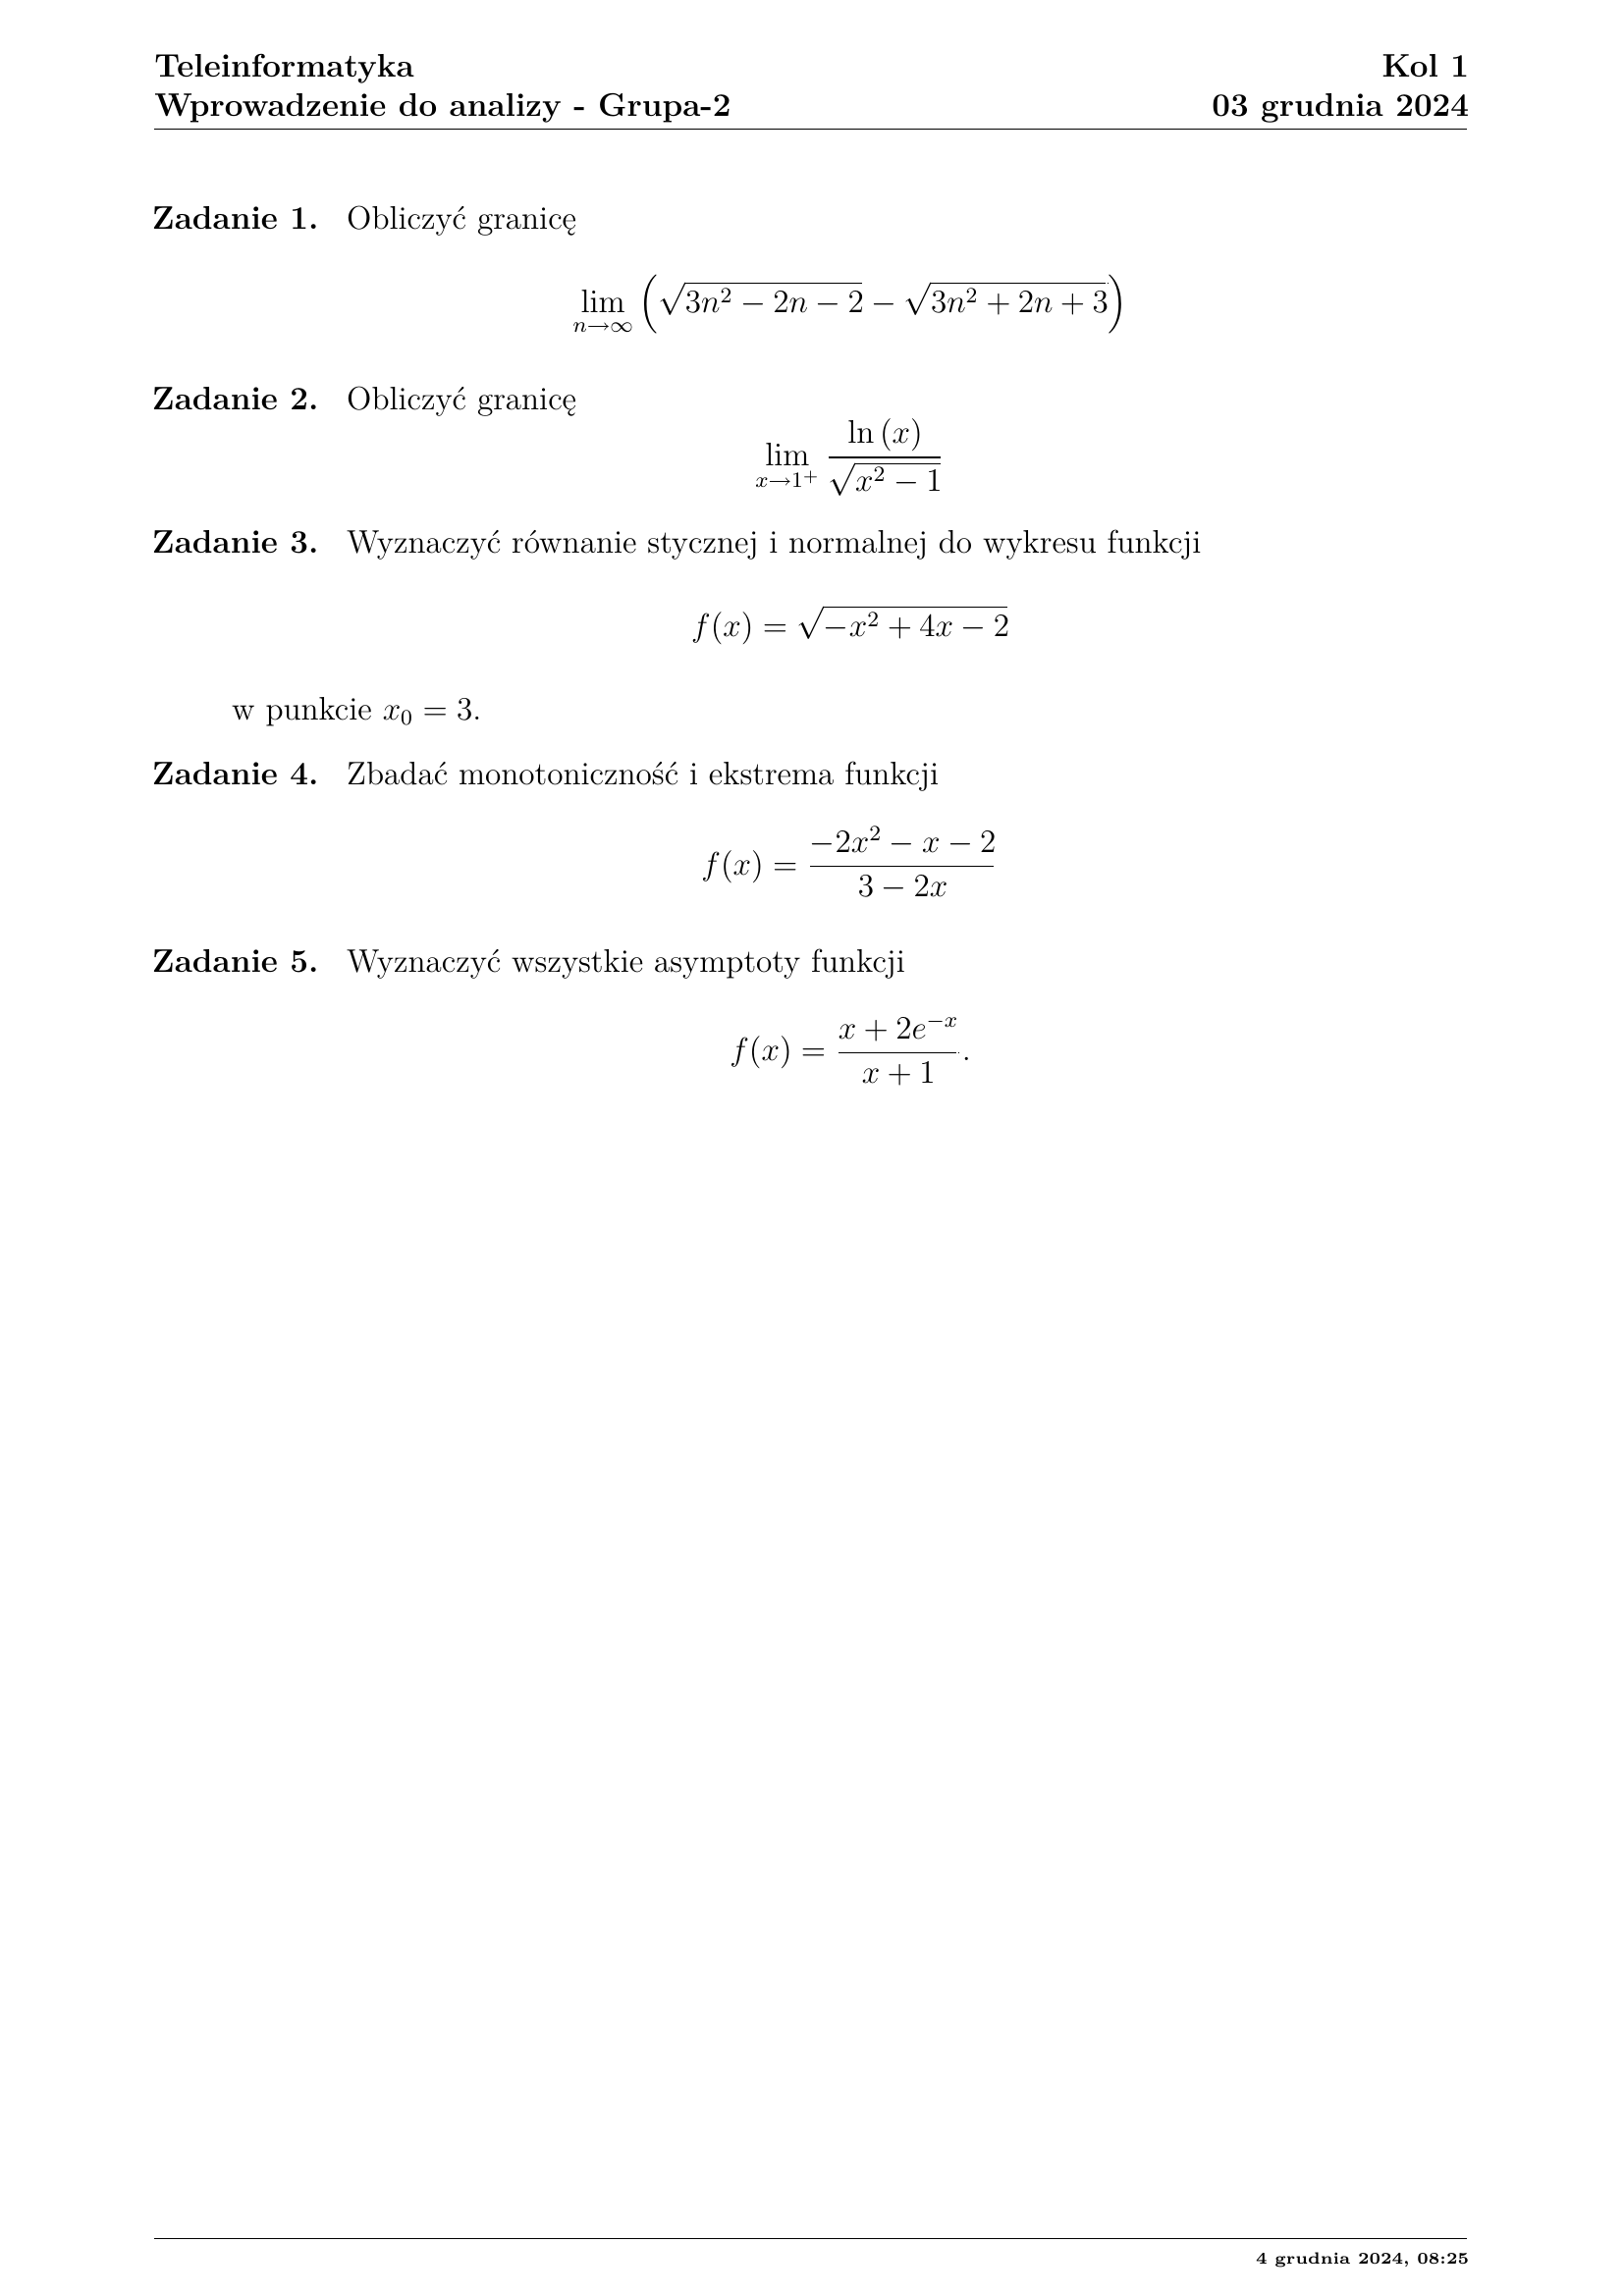

In [35]:
image = convert_from_path(f'wygenerowane/{nazwa_pliku}.pdf')
image[0].save(f'wygenerowane/{nazwa_pliku}.png')
display(Image(f'wygenerowane/{nazwa_pliku}.png', width=800))